In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score,  classification_report, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.calibration import calibration_curve
import os

In [223]:
df_native = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data//SISSIz_Excel/native.xlsx"))
df_sissiz_mono  = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data//SISSIz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data//SISSIz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data//SISSIz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data//SISSIz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data//SISSIz_Excel/alifoldz.xlsx"))

save_path = "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/SISSIz/"

In [224]:
filter = 50

df_native_filterd = df_native[(df_native['z-score calculated from 7 8 and 9'] >= -filter) & (df_native['z-score calculated from 7 8 and 9'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['z-score calculated from 7 8 and 9'] >= -filter) & (df_sissiz_mono['z-score calculated from 7 8 and 9'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['z-score calculated from 7 8 and 9'] >= -filter) & (df_sissiz_di['z-score calculated from 7 8 and 9'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['z-score calculated from 7 8 and 9'] >= -filter) & (df_multiperm_mono['z-score calculated from 7 8 and 9'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['z-score calculated from 7 8 and 9'] >= -filter) & (df_multiperm_di['z-score calculated from 7 8 and 9'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['z-score calculated from 7 8 and 9'] >= -filter) & (df_aln_shuffle['z-score calculated from 7 8 and 9'] <= filter)]

In [225]:
df_native_filterd.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8001,0.8120,0.0112,1.0263,0.5958,-56.49,-7.52,4.51,-10.86,ar14_01.txt
1,0.8114,0.8324,0.0112,1.0347,0.5984,-56.34,-7.92,4.07,-11.91,ar14_02.txt
2,0.8162,0.8264,0.0111,1.1251,0.6123,-61.86,-8.30,4.48,-11.97,ar14_03.txt
3,0.7784,0.7846,0.0128,1.0790,0.6139,-58.44,-6.50,4.05,-12.83,ar14_04.txt
4,0.7342,0.7423,0.0141,0.9834,0.6269,-55.42,-6.48,4.22,-11.61,ar14_05.txt
5,0.8005,0.8013,0.0115,1.0344,0.6204,-56.86,-7.52,4.69,-10.51,ar14_06.txt
6,0.8417,0.8445,0.0098,0.8988,0.6137,-47.26,-13.98,5.34,-6.23,ar14_07.txt
7,0.6591,0.6717,0.0133,1.0155,0.6251,-59.34,-3.34,3.00,-18.64,ar14_08.txt
8,0.6385,0.6523,0.0123,1.0589,0.6321,-59.80,-2.88,2.45,-23.24,ar14_09.txt
9,0.7047,0.7229,0.0144,0.9891,0.6249,-56.47,-3.72,3.45,-15.30,ar14_10.txt


In [226]:
df_native_filterd[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,0.852447,0.858465,0.008155,0.860437,0.503817,-36.908646,-12.081126,3.476019,-10.267225
std,0.111999,0.107637,0.005562,0.271113,0.093042,40.311312,23.480022,2.570305,11.587322
min,0.529500,0.550600,0.000000,0.032500,0.276400,-302.040000,-294.710000,0.000000,-48.910000
25%,0.790725,0.801525,0.004100,0.699400,0.424550,-41.217500,-16.075000,1.342500,-16.507500
50%,0.863500,0.866300,0.006900,0.914150,0.521450,-24.850000,-5.745000,3.250000,-4.565000
75%,0.942575,0.945750,0.012300,1.021550,0.576450,-12.505000,-0.862500,4.837500,-2.050000
max,1.000000,1.000000,0.035500,1.774800,0.775600,-0.380000,0.000000,18.190000,2.650000


In [227]:
df_sissiz_mono_filterd .head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.7878,0.7933,0.0105,0.2351,0.6330,-9.36,-12.74,4.56,0.74,neg_sample_SISSIz_mono_ar14_01.txt
1,0.8225,0.8366,0.0119,0.2220,0.6514,-5.42,-5.58,4.22,0.04,neg_sample_SISSIz_mono_ar14_02.txt
2,0.8307,0.8370,0.0101,0.2553,0.6560,-9.16,-17.53,5.99,1.40,neg_sample_SISSIz_mono_ar14_03.txt
3,0.7711,0.7756,0.0118,0.1501,0.6671,-5.54,-9.32,4.98,0.76,neg_sample_SISSIz_mono_ar14_04.txt
4,0.7262,0.7297,0.0142,0.1190,0.6790,-4.03,-6.18,3.86,0.56,neg_sample_SISSIz_mono_ar14_05.txt
5,0.7948,0.7955,0.0104,0.4192,0.5799,-15.61,-12.28,4.57,-0.73,neg_sample_SISSIz_mono_ar14_06.txt
6,0.8583,0.8548,0.0095,0.5617,0.6411,-22.94,-19.03,5.50,-0.71,neg_sample_SISSIz_mono_ar14_07.txt
7,0.6795,0.6896,0.0125,0.0233,0.6134,-0.49,-1.26,1.71,0.45,neg_sample_SISSIz_mono_ar14_08.txt
8,0.6250,0.6415,0.0141,0.0478,0.6368,-1.22,-1.13,1.70,-0.05,neg_sample_SISSIz_mono_ar14_09.txt
9,0.7340,0.7413,0.0119,0.1305,0.6655,-4.57,-3.98,3.01,-0.20,neg_sample_SISSIz_mono_ar14_10.txt


In [228]:
df_sissiz_mono_filterd [['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()


# Example neg_sample_SISSIz_mono_output_60_175.txt
# z-score = (RNAalifold consensus Minimum Free Energy (MFE) of the original alignment - Average consensus MFE in the sampled alignments) / Standard deviation of the consensus MFE in the sampled alignments
# z-z-z-z-z-z-z-z-z-z-score calculated from 7 8 and 9 calculated from 7 8 and 9 calculated from 7 8 and 9 calculated from 7 8 and 9 calculated from 7 8 and 9 calculated from 7 8 and 9 calculated from 7 8 and 9 calculated from 7 8 and 9 calculated from 7 8 and 9 = (-727 - -987) / 4.02 = 0,65

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.836745,0.842211,0.007859,0.289135,0.500970,-10.485570,-10.149078,2.926505,-0.031748
std,0.118968,0.114633,0.005214,0.336525,0.102533,21.421665,20.406508,2.494914,0.763705
min,0.550300,0.572800,0.000000,-0.000000,0.219800,-297.510000,-294.290000,0.000000,-4.040000
25%,0.751625,0.758775,0.003800,-0.000000,0.421150,-14.545000,-13.972500,0.770000,-0.350000
50%,0.851600,0.852500,0.006600,0.149050,0.509600,-3.925000,-3.500000,2.585000,0.150000
75%,0.936025,0.937500,0.011900,0.519600,0.577975,0.000000,-0.330000,4.570000,0.430000
max,1.000000,1.000000,0.033000,1.269200,0.789700,0.000000,0.000000,19.210000,1.870000


In [229]:
df_sissiz_di_filterd.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8261,0.8313,0.0108,0.2990,0.6237,-7.87,-8.10,4.15,0.06,neg_sample_SISSIz_di_ar14_01.txt
1,0.8429,0.8537,0.0118,0.2505,0.6101,-3.27,-4.02,3.82,0.20,neg_sample_SISSIz_di_ar14_02.txt
2,0.8222,0.8394,0.0112,0.3351,0.5757,-6.17,-5.50,3.63,-0.18,neg_sample_SISSIz_di_ar14_03.txt
3,0.7864,0.7957,0.0110,0.0491,0.6635,-0.76,-3.03,2.72,0.83,neg_sample_SISSIz_di_ar14_04.txt
4,0.7519,0.7605,0.0118,0.3337,0.6756,-9.59,-8.90,5.79,-0.12,neg_sample_SISSIz_di_ar14_05.txt
5,0.7917,0.7917,0.0118,0.2434,0.6169,-8.27,-9.42,4.37,0.26,neg_sample_SISSIz_di_ar14_06.txt
6,0.8439,0.8469,0.0103,0.3727,0.5760,-5.65,-5.25,3.68,-0.11,neg_sample_SISSIz_di_ar14_07.txt
7,0.6602,0.6754,0.0129,-0.0000,0.6392,0.00,-2.88,2.55,1.13,neg_sample_SISSIz_di_ar14_08.txt
8,0.6838,0.6928,0.0136,0.1906,0.6533,-5.82,-2.73,2.74,-1.13,neg_sample_SISSIz_di_ar14_09.txt
9,0.7306,0.7430,0.0126,0.1797,0.6141,-4.82,-2.23,2.41,-1.07,neg_sample_SISSIz_di_ar14_10.txt


In [230]:
df_sissiz_di_filterd[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,0.839873,0.847123,0.008142,0.297699,0.503229,-10.648348,-10.345832,3.079344,-0.035188
std,0.117928,0.112848,0.005580,0.336684,0.108209,22.353793,21.670977,2.590616,0.778869
min,0.522900,0.556100,0.000000,-0.000000,0.203500,-276.590000,-277.540000,0.000000,-3.990000
25%,0.757750,0.768250,0.003800,-0.000000,0.419050,-14.290000,-13.995000,0.815000,-0.420000
50%,0.852000,0.857700,0.006900,0.158700,0.510600,-3.600000,-3.910000,2.820000,0.140000
75%,0.937550,0.940400,0.012300,0.515750,0.578050,0.000000,-0.380000,4.620000,0.430000
max,1.000000,1.000000,0.038700,1.181300,0.898000,0.000000,0.000000,16.290000,2.120000


In [231]:
df_multiperm_mono_filterd.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.6779,0.6895,0.0149,0.0555,0.7166,-1.98,-3.26,2.50,0.51,neg_sample_MULTIPERM_mono_ar14_01.txt
1,0.6629,0.6769,0.0137,0.1675,0.7079,-5.46,-3.71,2.84,-0.62,neg_sample_MULTIPERM_mono_ar14_02.txt
2,0.6747,0.6843,0.0155,0.1472,0.7246,-5.79,-3.44,2.57,-0.92,neg_sample_MULTIPERM_mono_ar14_03.txt
3,0.6647,0.6752,0.0151,0.0745,0.7273,-2.64,-1.43,1.52,-0.80,neg_sample_MULTIPERM_mono_ar14_04.txt
4,0.6232,0.6324,0.0187,0.0519,0.7265,-2.18,-1.32,1.41,-0.61,neg_sample_MULTIPERM_mono_ar14_05.txt
5,0.6560,0.6651,0.0156,0.2158,0.7292,-8.61,-3.84,2.62,-1.82,neg_sample_MULTIPERM_mono_ar14_06.txt
6,0.6942,0.7017,0.0154,0.2251,0.7211,-10.03,-5.51,2.95,-1.53,neg_sample_MULTIPERM_mono_ar14_07.txt
7,0.5492,0.5644,0.0192,-0.0000,0.7497,0.00,-0.48,0.82,0.58,neg_sample_MULTIPERM_mono_ar14_08.txt
8,0.5561,0.5725,0.0143,-0.0000,0.7358,0.00,-0.42,0.90,0.47,neg_sample_MULTIPERM_mono_ar14_09.txt
9,0.6094,0.6242,0.0137,0.0993,0.7228,-3.78,-1.14,1.22,-2.17,neg_sample_MULTIPERM_mono_ar14_10.txt


In [232]:
df_multiperm_mono_filterd[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,0.651938,0.665429,0.016879,0.126756,0.619123,-5.412893,-4.547094,1.963499,-0.283547
std,0.120398,0.113052,0.006668,0.174192,0.073224,13.670607,12.052073,2.099861,1.371582
min,0.361700,0.400500,0.000000,-0.000000,0.441200,-166.240000,-158.320000,0.000000,-21.470000
25%,0.560600,0.582000,0.012500,0.000000,0.558825,-5.352500,-4.427500,0.342500,-0.517500
50%,0.657950,0.671600,0.016200,0.036050,0.630000,-0.990000,-1.000000,1.365000,0.100000
75%,0.750125,0.755075,0.020400,0.205050,0.675900,0.000000,-0.090000,2.907500,0.320000
max,0.923200,1.000000,0.050300,0.882400,0.829300,0.000000,0.000000,15.290000,2.980000


In [233]:
df_multiperm_di_filterd.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.6749,0.6860,0.0149,0.1363,0.7201,-5.02,-4.98,2.87,-0.01,neg_sample_MULTIPERM_di_ar14_01.txt
1,0.6838,0.6929,0.0148,0.1545,0.7032,-5.29,-4.15,2.92,-0.39,neg_sample_MULTIPERM_di_ar14_02.txt
2,0.6888,0.6941,0.0151,0.1717,0.7293,-6.00,-4.38,2.71,-0.60,neg_sample_MULTIPERM_di_ar14_03.txt
3,0.6686,0.6769,0.0141,0.2122,0.7143,-8.04,-3.02,2.38,-2.11,neg_sample_MULTIPERM_di_ar14_04.txt
4,0.6406,0.6514,0.0160,0.0785,0.7312,-3.39,-3.31,2.41,-0.03,neg_sample_MULTIPERM_di_ar14_05.txt
5,0.6753,0.6809,0.0131,0.2065,0.7384,-9.67,-7.29,3.93,-0.61,neg_sample_MULTIPERM_di_ar14_06.txt
6,0.6754,0.6813,0.0182,0.2446,0.7291,-10.79,-8.49,4.61,-0.50,neg_sample_MULTIPERM_di_ar14_07.txt
7,0.5748,0.5880,0.0181,0.0873,0.7344,-4.11,-2.14,2.18,-0.90,neg_sample_MULTIPERM_di_ar14_08.txt
8,0.5497,0.5682,0.0161,0.0880,0.7476,-3.48,-1.05,1.59,-1.53,neg_sample_MULTIPERM_di_ar14_09.txt
9,0.5970,0.6128,0.0158,0.0281,0.7312,-1.11,-1.64,1.89,0.28,neg_sample_MULTIPERM_di_ar14_10.txt


In [234]:
df_multiperm_di_filterd[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,0.652578,0.665590,0.016761,0.173153,0.618205,-7.455944,-6.081586,2.421949,-0.537082
std,0.120483,0.113799,0.006728,0.196081,0.073138,14.947825,13.287676,2.282630,2.063799
min,0.376900,0.417300,0.000000,-0.000000,0.437800,-165.230000,-154.640000,0.000000,-44.220000
25%,0.562425,0.582450,0.012200,0.000000,0.558500,-8.265000,-6.667500,0.632500,-0.920000
50%,0.660500,0.672750,0.016100,0.105450,0.628800,-2.650000,-1.740000,1.945000,-0.050000
75%,0.754050,0.755800,0.020200,0.286750,0.675475,0.000000,-0.240000,3.597500,0.280000
max,0.933900,1.000000,0.044900,0.946000,0.817300,0.000000,0.000000,15.170000,2.070000


In [235]:
df_aln_shuffle_filterd.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.7191,0.7337,0.0288,-0.0000,0.5795,0.00,-0.17,0.51,0.33,neg_sample_ALIFOLDz_ar14_01.txt
2,0.6559,0.6865,0.0272,0.2971,0.5709,-2.50,-0.05,0.32,-7.75,neg_sample_ALIFOLDz_ar14_10.txt
3,0.8505,0.8967,0.0214,-0.0000,0.5365,0.00,-0.23,0.59,0.40,neg_sample_ALIFOLDz_ar14_12.txt
4,0.8688,0.8807,0.0100,0.3808,0.5324,-9.17,-12.64,4.93,0.71,neg_sample_ALIFOLDz_ar15_01.txt
5,0.7420,0.7515,0.0174,0.2294,0.5198,-3.78,-4.04,3.16,0.08,neg_sample_ALIFOLDz_ar15_02.txt
6,0.8724,0.8656,0.0128,0.4856,0.5275,-8.67,-7.48,3.58,-0.33,neg_sample_ALIFOLDz_ar15_04.txt
7,0.7865,0.7878,0.0119,0.4766,0.5280,-19.18,-18.62,5.18,-0.11,neg_sample_ALIFOLDz_ar35_01.txt
8,0.9442,0.9579,0.0055,0.6807,0.5896,-44.05,-47.02,7.89,0.38,neg_sample_ALIFOLDz_ar45_01.txt
9,1.0000,1.0000,0.0000,1.0000,0.5642,-50.00,-58.00,8.58,0.93,neg_sample_ALIFOLDz_ar45_03.txt
10,0.9314,0.9279,0.0096,0.7580,0.5398,-29.16,-27.54,5.62,-0.29,neg_sample_ALIFOLDz_ar45_05.txt


In [236]:
df_aln_shuffle_filterd[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,0.844101,0.850858,0.008633,0.601360,0.524285,-23.241677,-12.246087,3.294369,-5.772795
std,0.124228,0.121098,0.007638,0.447184,0.092689,29.816776,23.064608,2.593038,10.246812
min,0.519300,0.574400,0.000000,-0.000000,0.244400,-259.930000,-254.800000,0.000000,-49.730000
25%,0.754450,0.761850,0.003700,0.366350,0.451000,-28.440000,-16.815000,0.970000,-7.005000
50%,0.860400,0.863900,0.007000,0.601100,0.543400,-15.420000,-6.470000,3.210000,-1.200000
75%,0.947950,0.958050,0.012950,0.854050,0.590450,-6.295000,-0.510000,4.990000,0.000000
max,1.000000,1.000000,0.089900,7.083300,0.783300,0.000000,0.000000,16.660000,1.680000


In [237]:
def plot_columns(columnname, thresholds):
    dataframes = [df_native_filterd, df_sissiz_mono_filterd , df_sissiz_di_filterd, df_multiperm_mono_filterd, df_multiperm_di_filterd, df_aln_shuffle_filterd]
    labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
    data = [df[columnname] for df in dataframes]

    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels)

    if thresholds == None:
        thresholds = []
    else:
        for t in thresholds:
            plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

    plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
    plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
    plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

    if save_path:
        filename = os.path.join(save_path, f"SISSIz: Boxplot {columnname} with native samples")
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    # plt.ylim(0.0, 1.0)
    plt.title(f'SISSIz: Boxplot {columnname}')
    plt.legend()
    plt.show()

## Mean Pairwise Identity (MPI) of the input alignment

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


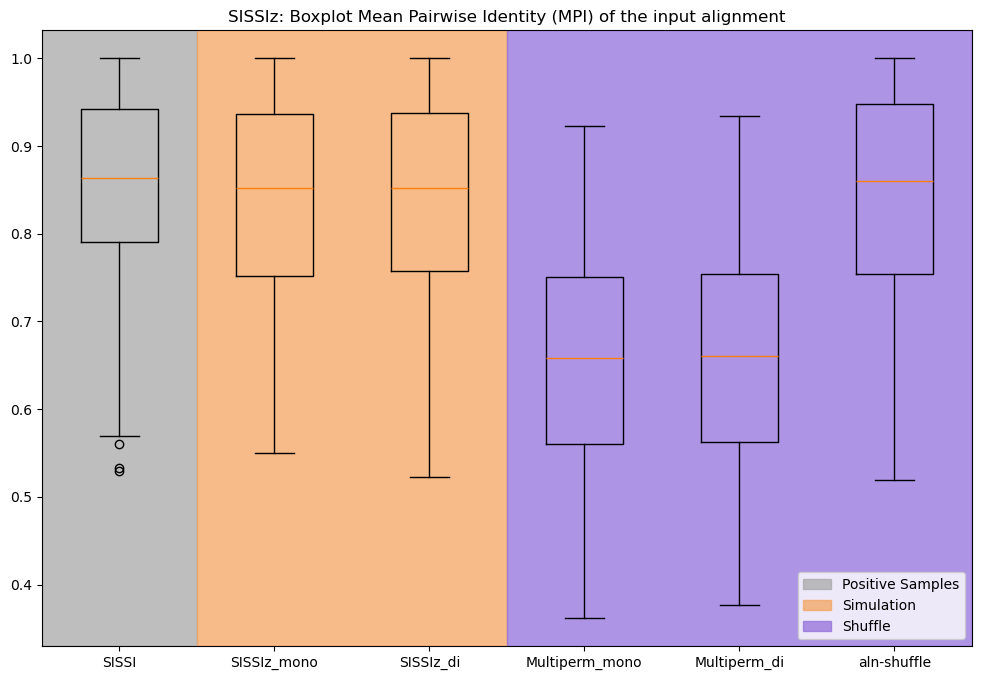

In [238]:
plot_columns('Mean Pairwise Identity (MPI) of the input alignment', None)

## Average MPI of the sampled alignments

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


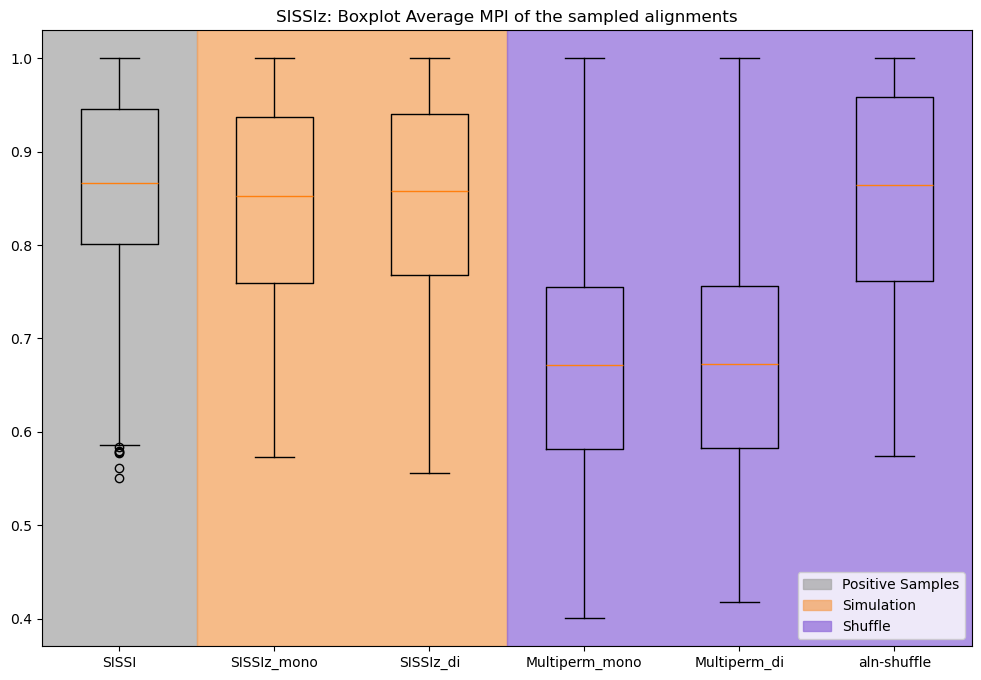

In [239]:
plot_columns('Average MPI of the sampled alignments', None)

## Standard deviation of the MPIs of the sampled alignments

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


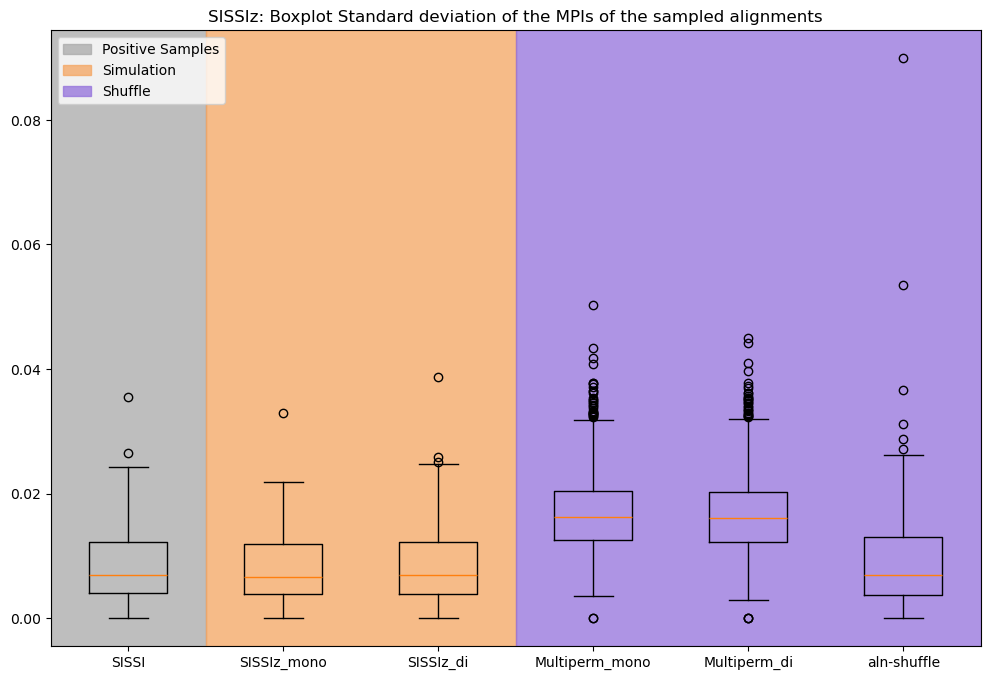

In [240]:
plot_columns('Standard deviation of the MPIs of the sampled alignments', None)

## Structural Conservation Index (SCI)

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


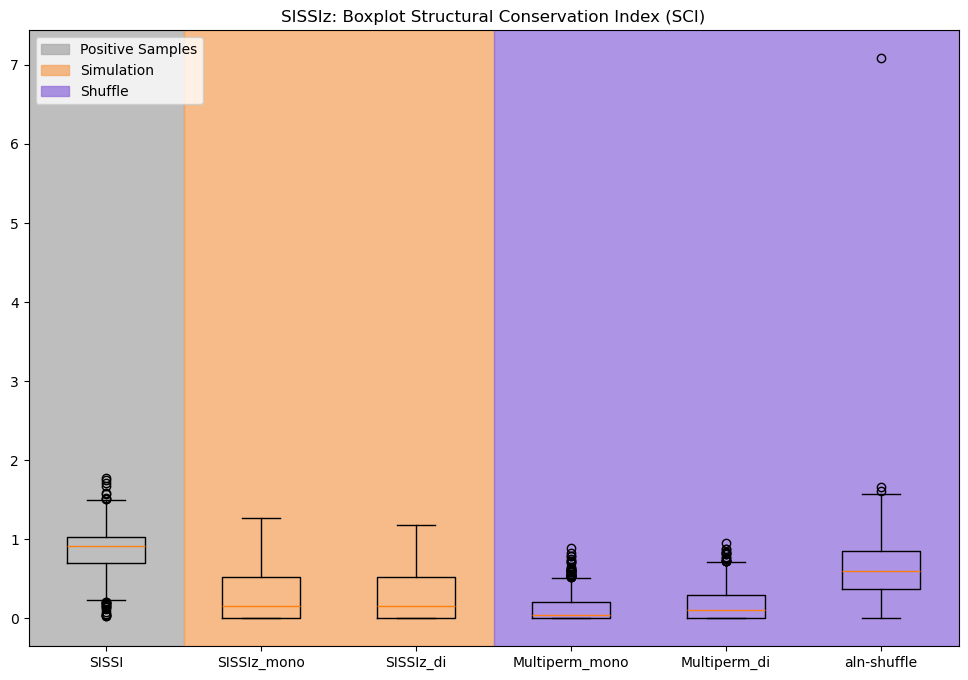

In [241]:
plot_columns('Structural Conservation Index (SCI)', None)

## GC-Content

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


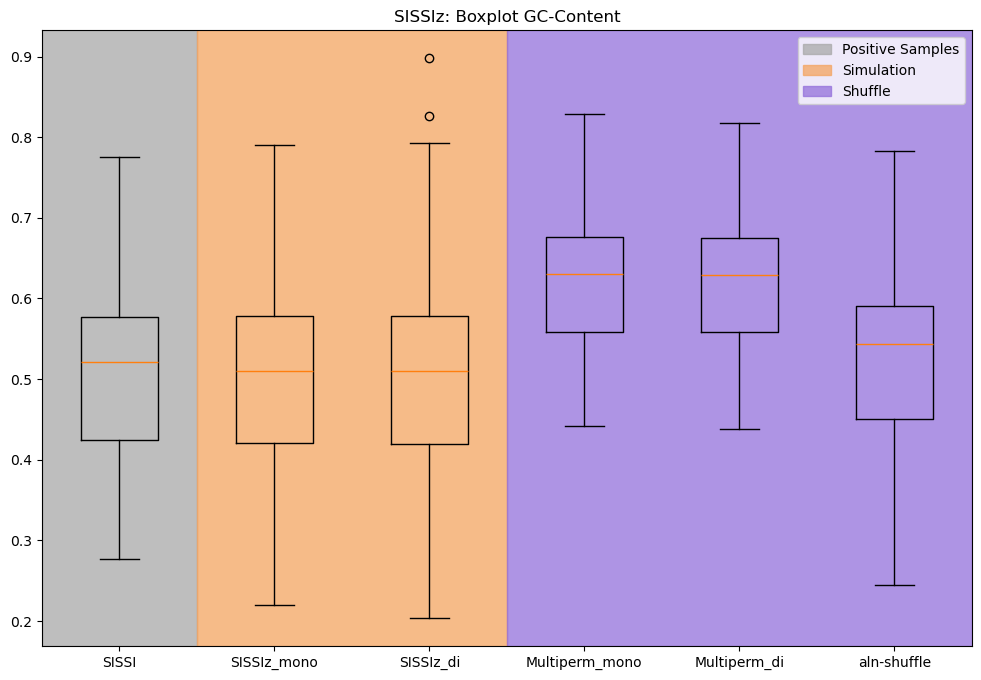

In [242]:
plot_columns('GC-Content', None)

## RNAalifold consensus Minimum Free Energy (MFE) of the original alignment

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


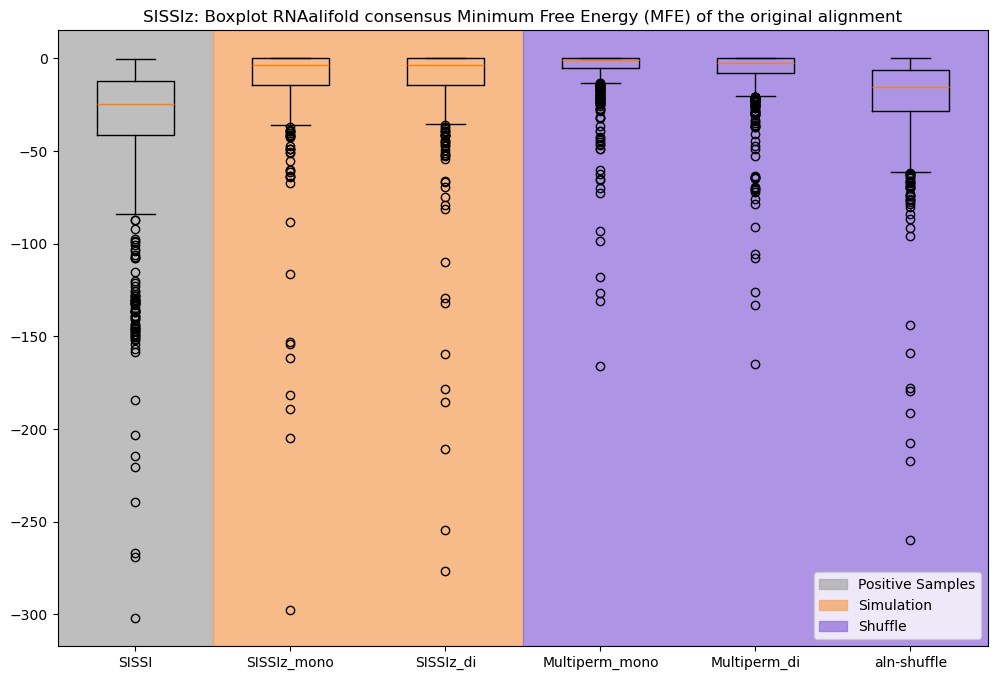

In [243]:
plot_columns('RNAalifold consensus Minimum Free Energy (MFE) of the original alignment', None)

## Average consensus MFE in the sampled alignments

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


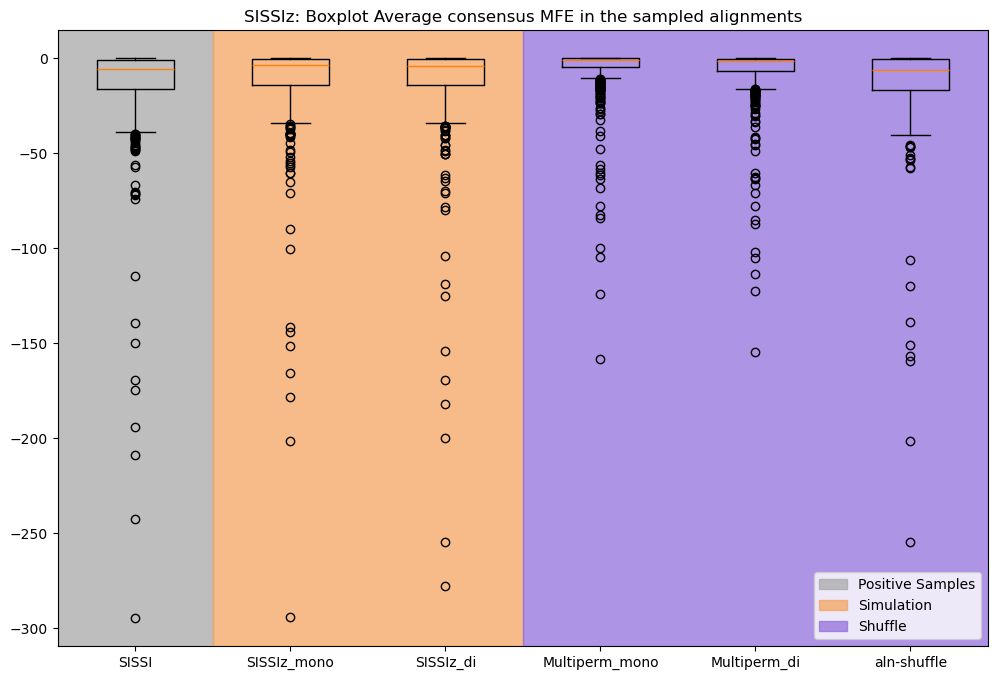

In [244]:
plot_columns('Average consensus MFE in the sampled alignments', None)

## Standard deviation of the consensus MFE in the sampled alignments

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


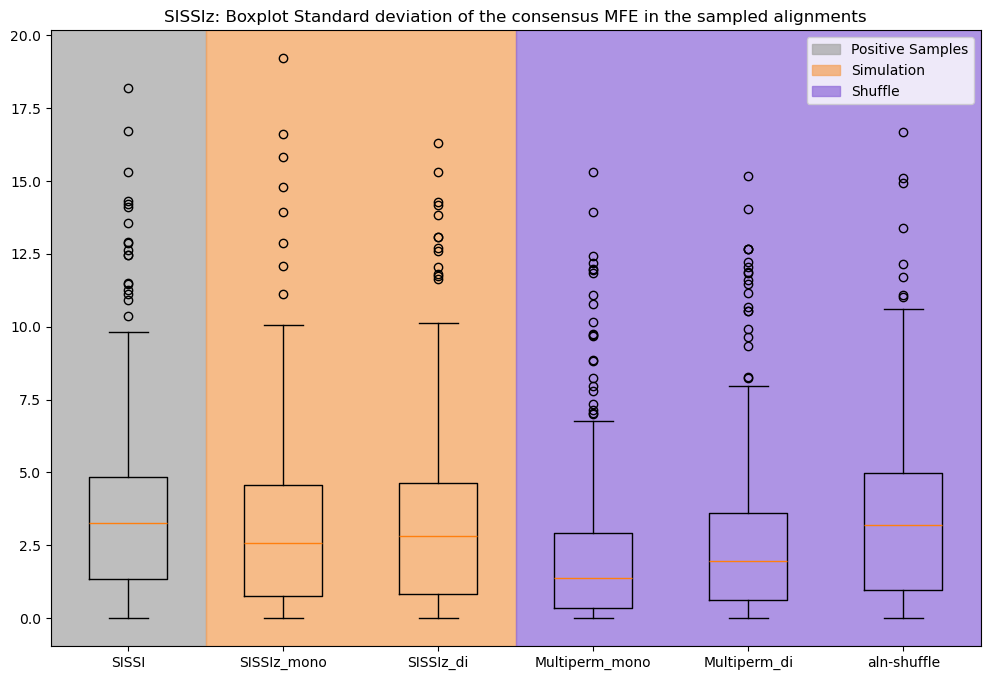

In [245]:
plot_columns('Standard deviation of the consensus MFE in the sampled alignments', None)

## z-score 

/tmp/ipykernel_4278/427383595.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_4278/427383595.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_4278/427383595.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_4278/427383595.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


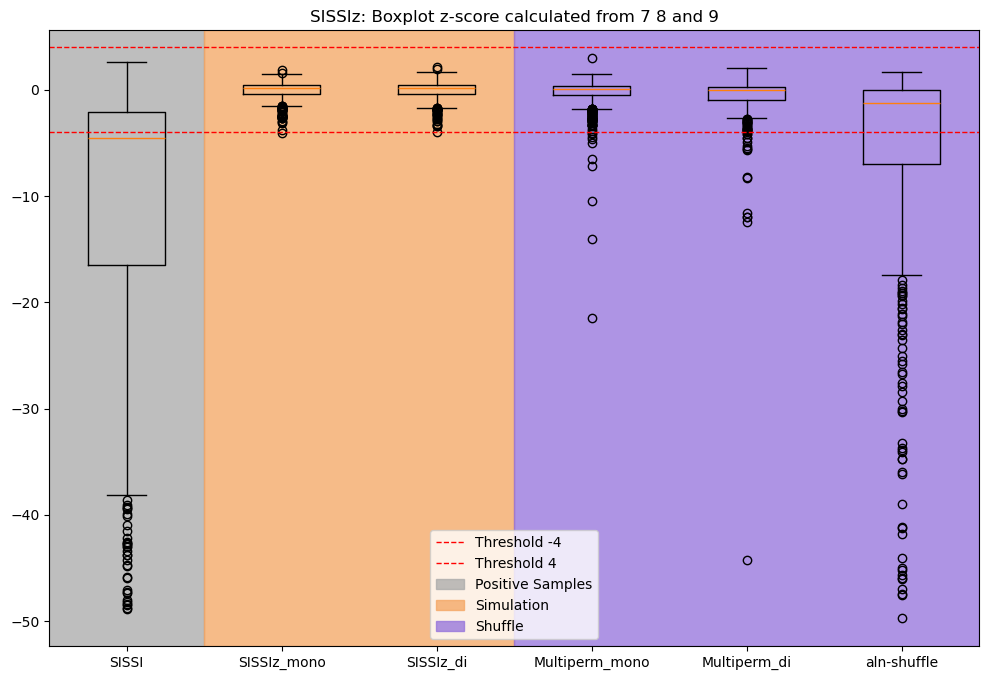

In [246]:
plot_columns('z-score calculated from 7 8 and 9', [-4, 4])